# Coding Block 3 - Decision Trees

### Load the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
from plotly.tools import FigureFactory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
'''
...
'''

'\n...\n'

### Read the dataset (the complete data with outliers and missing data). 

In [3]:
diab=pd.read_csv('C:\\Users\\v.weber\\Documents\\000 Master Wirtschaftsinformatik FU Berlin\\I\\Applied Analytics\\github stuff\\fork\\Applied-Analytics\\data\\diabetes.csv')

### Build a decision tree model
Think of training-test distinction -- with cross validation.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X = diab.drop(columns=['Outcome'])  # Feature variables
y = diab['Outcome']  # Outcome variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build the decision tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training and test sets
X = diab.drop(columns=['Outcome'])  # Feature variables
y = diab['Outcome']  # Outcome variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define hyperparameters
max_depth = 5  # Maximum depth of the tree
min_samples_split = 5  # Minimum number of samples required to split an internal node
min_samples_leaf = 10  # Minimum number of samples required to be at a leaf node

# Build the decision tree model with hyperparameters
decision_tree_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf
)
decision_tree_model.fit(X_train, y_train)

# The decision tree model is now stored in the variable 'decision_tree_model'
# The decision tree model is now stored in the variable 'decision_tree_model'

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                       random_state=42)

### Evaluate the prediction model using a classification report
Does the model look like a successful model?

In [20]:
from sklearn.metrics import classification_report

# Evaluate the model on the training data
y_train_pred = decision_tree_model.predict(X_train)
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model on the test data
y_test_pred = decision_tree_model.predict(X_test)
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       377
           1       0.79      0.64      0.71       199

    accuracy                           0.82       576
   macro avg       0.81      0.78      0.79       576
weighted avg       0.82      0.82      0.81       576

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       123
           1       0.63      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.74      0.73      0.73       192



## Visualize the Decision Tree

One way to  do this is using <b>

    <i>from sklearn.tree import plot_tree</i>

Alternative way of plotting the decision tree using

    <i> from sklearn.tree import export_graphviz import pydotplus </i>

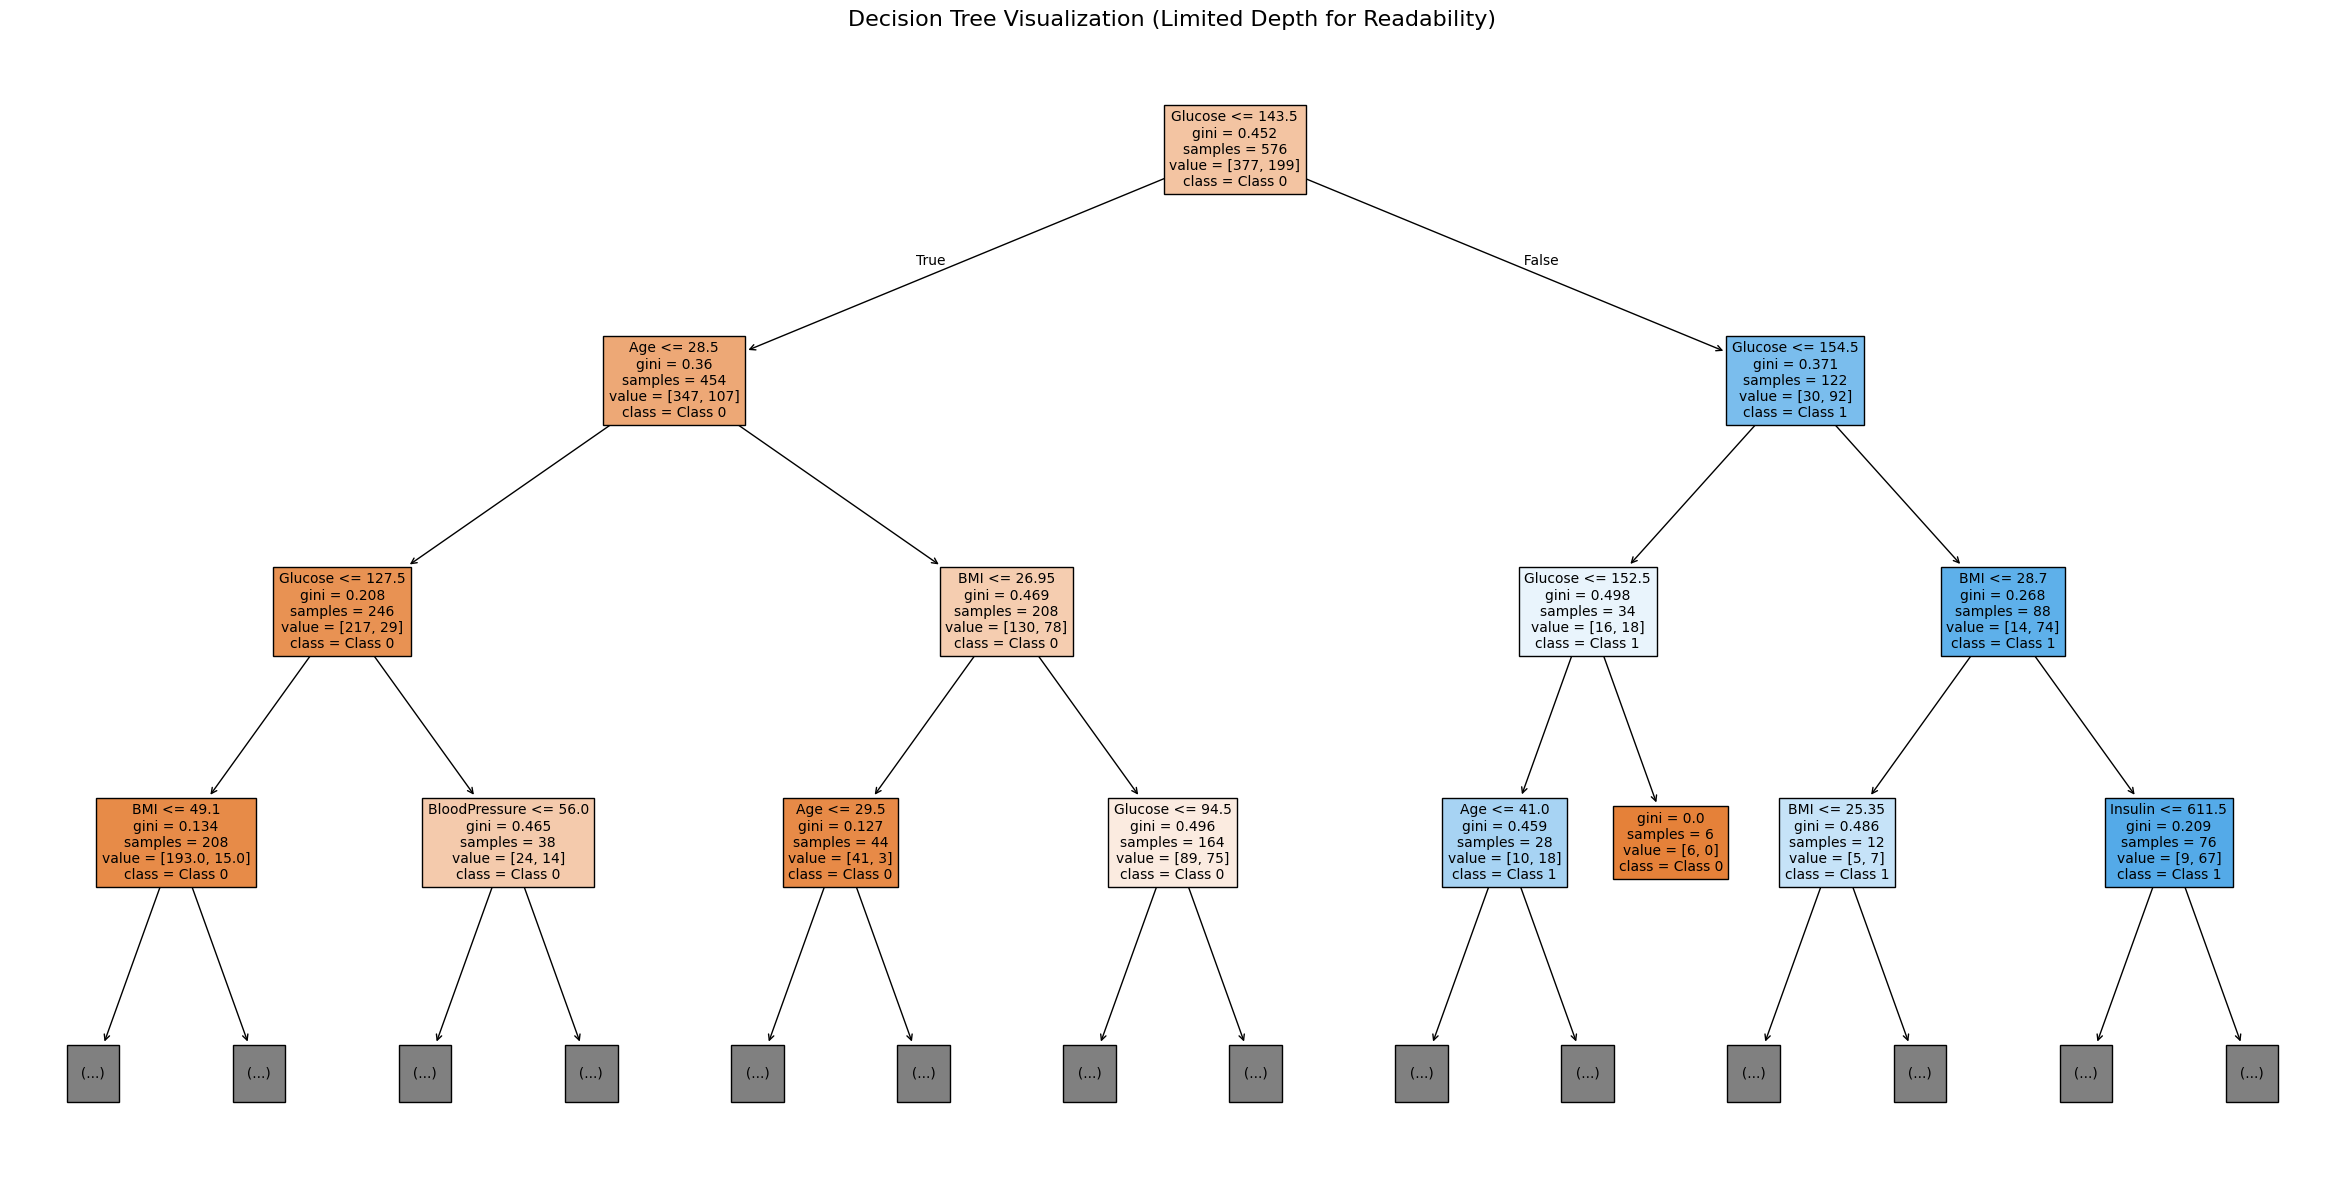

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree with adjustments for readability
plt.figure(figsize=(30, 15))  # Increase the figure size for better readability
plot_tree(
    decision_tree_model, 
    feature_names=X.columns, 
    class_names=['Class 0', 'Class 1'], 
    filled=True, 
    fontsize=10,  # Increase font size for better readability
    max_depth=3   # Limit the depth of the tree for visualization
)
plt.title("Decision Tree Visualization (Limited Depth for Readability)", fontsize=16)
plt.show()

### Make Decision Rules

Make the decision rules explicit. You can use (e.g.)
    <i> from sklearn.tree import export_text </i>

In [8]:
from sklearn.tree import export_text

# Export the decision rules as text
decision_tree_rules = export_text(decision_tree_model, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(decision_tree_rules)

Decision Tree Rules:
|--- Glucose <= 143.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- Glucose <= 106.50
|   |   |   |   |   |   |--- Insulin <= 154.00
|   |   |   |   |   |   |   |--- SkinThickness <= 41.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  41.50
|   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |--- clas